In [55]:
import pandas as pd
import numpy as np
london = pd.read_csv(r'C:\work\Data_analyst\data_for_courses\london.csv', parse_dates = ['timestamp'])

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# данные за два года: с 4 января 2015 по 3 января 2017 о числе аренд велосипедов в Лондоне
london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [57]:
london = london.set_index(london.timestamp)

In [58]:
# посчитаем число аренд по дням
london = london.resample(rule='D').sum()

<AxesSubplot:xlabel='timestamp'>

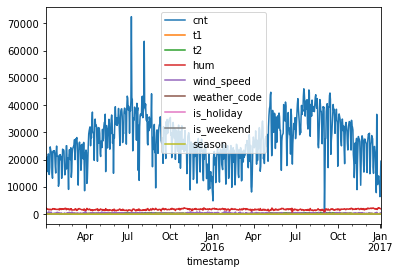

In [53]:
# есть выбросы!
london.plot()

In [54]:
# посчитаем скользящее среднее, чтобы сгладить ряд
london_roll = london.rolling(window=3).mean()
london_roll

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,16739.666667,147.000000,101.500000,2027.833333,258.833333,74.333333,0.0,8.0,72.0
2015-01-07,20683.000000,184.333333,130.833333,1872.500000,350.333333,71.333333,0.0,0.0,71.0
2015-01-08,19092.666667,198.000000,139.500000,1864.500000,443.333333,72.666667,0.0,0.0,71.0
...,...,...,...,...,...,...,...,...,...
2016-12-30,12682.000000,73.666667,28.166667,2287.166667,179.666667,67.000000,0.0,0.0,72.0
2016-12-31,12347.333333,115.833333,68.333333,2237.000000,227.000000,76.000000,0.0,8.0,72.0
2017-01-01,9803.666667,141.666667,84.333333,2224.666667,291.500000,117.666667,0.0,16.0,72.0


In [61]:
# считаем стандартное отклонение
std = np.std(london.cnt - london_roll.cnt)
std

4558.586641117938

In [68]:
# определим границы 99% доверительного интервала
london['upper_bound'] = london_roll.cnt + 2.576*std
london['lower_bound'] = london_roll.cnt - 2.576*std

In [73]:
# наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала
london.query('cnt > upper_bound')
# 2015-07-09 Лондон: транспортный хаос из-за забастовки в метро 

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,upper_bound,lower_bound
timestamp,,,,,,,,,,,
2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,62447.919188,38962.080812
2015-08-06,63468,466.5,466.5,1625.0,357.5,50.0,0.0,0.0,24.0,58370.252521,34884.414146
2016-09-04,27512,452.5,452.5,1676.5,561.5,71.0,0.0,24.0,48.0,26001.919188,2516.080812
2016-12-25,36653,300.0,300.0,1906.0,664.0,87.0,0.0,24.0,72.0,31393.585854,7907.747479


In [74]:
# наблюдения, для которых наблюдаемые значения оказались меньше нижней границы 99% доверительного интервала
london.query('cnt < lower_bound')
# 2016-09-02 - ошибка при сборе днных

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,upper_bound,lower_bound
timestamp,,,,,,,,,,,
2015-05-14,15609,237.5,189.5,2039.0,513.0,118.0,0.0,0.0,0.0,40452.252521,16966.414146
2015-07-12,23240,444.5,444.5,1811.5,520.5,80.0,0.0,24.0,24.0,47779.585854,24293.747479
2015-07-24,16034,380.5,380.5,1810.0,275.0,108.0,0.0,0.0,24.0,42756.585854,19270.747479
2015-08-24,17400,380.0,380.0,2099.0,321.0,126.0,0.0,0.0,24.0,41272.252521,17786.414146
2015-11-14,8898,270.0,235.0,1951.0,560.0,105.0,0.0,24.0,48.0,32780.252521,9294.414146
2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37829.252521,14343.414146
2016-09-10,17080,460.0,460.0,1932.0,392.0,89.0,0.0,24.0,48.0,43004.919188,19519.080812
2016-09-16,21967,416.0,416.0,1900.5,416.0,115.0,0.0,0.0,48.0,47936.252521,24450.414146
2016-11-12,8990,214.0,180.0,1976.0,247.5,108.0,0.0,23.0,46.0,32620.919188,9135.080812
